In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix , roc_auc_score , roc_curve,classification_report
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<AxesSubplot:xlabel='age', ylabel='Percent'>

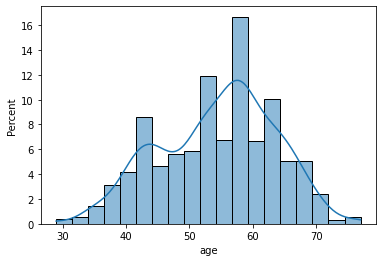

In [3]:
sns.histplot(data= data  , x = 'age' , kde = True , stat='percent')

In [4]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.cp.value_counts(normalize=True)*100

0    48.487805
2    27.707317
1    16.292683
3     7.512195
Name: cp, dtype: float64

In [8]:
x = data.drop(columns=['target'])
print(x.shape)
x.head()

(1025, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [9]:
y=data['target']
print(y.shape)
y.head()

(1025,)


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y  , test_size=0.25, random_state=42)
print("x_train shape  :-",x_train.shape)
print("x_test  shape  :-", x_test.shape)
print("y_train shape  :-", y_train.shape)
print("y_test shape   :-", y_test.shape)

x_train shape  :- (768, 13)
x_test  shape  :- (257, 13)
y_train shape  :- (768,)
y_test shape   :- (257,)


In [11]:
ss = StandardScaler()
scaled_data_x = ss.fit_transform(x_train)
scaled_data_x.shape
pd.DataFrame(scaled_data_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.288789,0.653842,-0.928547,0.017985,-0.777170,-0.415354,0.91512,0.798869,1.401874,-0.909004,0.989105,-0.729558,1.111259
1,0.612727,0.653842,-0.928547,-0.383210,0.283094,-0.415354,-0.98952,-0.375645,1.401874,1.539295,-0.655122,0.223334,1.111259
2,0.828686,0.653842,0.035134,-0.211269,-0.756380,2.407584,-0.98952,-0.419146,-0.713331,-0.909004,0.989105,-0.729558,-0.545920
3,1.692522,0.653842,0.998815,1.622764,0.511779,-0.415354,0.91512,-1.637161,1.401874,1.626734,-0.655122,0.223334,1.111259
4,1.260604,0.653842,-0.928547,-0.669777,1.197832,-0.415354,-0.98952,0.059360,-0.713331,-0.559247,-0.655122,-0.729558,-0.545920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-1.438883,0.653842,0.998815,-0.096642,-0.631643,-0.415354,-0.98952,0.798869,-0.713331,0.839781,-0.655122,-0.729558,-0.545920
764,0.720707,0.653842,-0.928547,0.476493,-0.777170,-0.415354,-0.98952,-0.506147,1.401874,0.752342,0.989105,0.223334,1.111259
765,-0.359088,0.653842,-0.928547,0.476493,1.135463,-0.415354,0.91512,1.016372,1.401874,0.490024,0.989105,-0.729558,1.111259
766,-1.222924,0.653842,-0.928547,-1.242912,-0.694012,-0.415354,0.91512,0.494366,-0.713331,-0.909004,0.989105,-0.729558,1.111259


In [12]:
naive_bayes = GaussianNB()
naive_bayes.fit(scaled_data_x, y_train)

GaussianNB()

In [13]:
x_test = ss.fit_transform(x_test) ##  before predicting the model use standardization on x test
y_pred = naive_bayes.predict(x_test)
y_pred   #### PREDICTED DATA

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [14]:
np.array(y_test)  ## ACTUAL DATA

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [15]:
print("ACCURACY OF  THE TRAIN DATA  : -",(naive_bayes.score(scaled_data_x , y_train)*100)) ## SCORE OF THE TRAIN DATA
print("ACCURACY OF THE TEST DATA   : -",(naive_bayes.score(x_test, y_test)*100))    ### SCORE OF THE TEST  DATA

ACCURACY OF  THE TRAIN DATA  : - 84.375
ACCURACY OF THE TEST DATA   : - 80.93385214007782


## OVERALL  ACCURACY / PRECISION / RECALL / F1 - SCORE 

In [16]:
print_score(naive_bayes, scaled_data_x, y_train, x_test, y_test, train=True)
print_score(naive_bayes, scaled_data_x, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 84.38%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.857971    0.832151   0.84375    0.845061      0.844490
recall       0.806540    0.877805   0.84375    0.842172      0.843750
f1-score     0.831461    0.854369   0.84375    0.842915      0.843422
support    367.000000  401.000000   0.84375  768.000000    768.000000
_______________________________________________
Confusion Matrix: 
 [[296  71]
 [ 49 352]]

Test Result:
Accuracy Score: 80.93%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.880734    0.756757  0.809339    0.818745      0.820434
recall       0.727273    0.896000  0.809339    0.811636      0.809339
f1-score     0.796680    0.820513  0.809339    0.808597      0.808272
support    132.000000  125.000000  0.809339  257.000000    257.

In [17]:
data.sex.str.startswith(("male"))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
